<a href="https://colab.research.google.com/github/nastyabekesheva/labs/blob/master/MyMath/Physics/physics_labs_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd

# Lab 1

>[Lab 1](#scrollTo=86MdTIYSpHi3)

>>[Data](#scrollTo=k6d2zG5spxKY)

>[Lab 2](#scrollTo=oOrJLR3huLVD)

>>[Data](#scrollTo=tpDOWUVnuOd4)

>>[Graph of dependecy between U and I](#scrollTo=02utVQrYA2IV)

>>[Graph of dependecy between approximized U and I](#scrollTo=I2ZhOk8xA_Hm)

>>[Calculations](#scrollTo=CNV_u4gpEnfq)



## Data

In [2]:
r = 2 #cm
k = 10**10 #Nm^2/Kl^2
phi = np.array([2.5, 5, 7.5, 10, 12.5, 15]) #kV
R = np.array([[5, 4.8, 4.9], [7, 6.8, 7.1], [8.8, 8.9, 9], [12.4, 12.5, 12.6], [17.5, 17.6, 17.3], [21, 20.9, 21.2]]) #cm

We need to find:


*   $\langle R\rangle$
*   $q$
*   $E$
*   $R_{theor}$
*   $\Delta r$
*   $\varepsilon_r$



In [3]:
print('Privet Mir')

Privet Mir


# Lab 2

## Data

In [4]:
battery = {
     'U_0' : np.repeat(4.5, 8),
     'I' : np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.75, 0.9]),
     'U' : np.array([4.3, 3.8, 3.6, 3.5, 2.8, 2.6, 2.25, 1.5])
}
accumulator = {
     'U_0' : np.repeat(13, 20),
     'I' : np.array([float(i/10) for i in range(1,21)]),
     'U' : np.array([float(i/100) for i in range(1200,1300) if i%5==0][::-1])
}
power_supply = {
     'U_0' : np.repeat(12.13, 8),
     'I' : np.array([float(i/100) for i in range(1,225) if i%25==0]),
     'U' : np.array([12.09, 12.02, 11.9, 11.85, 11.8, 11.77, 11.71, 11.65])
}

In [5]:
pd.DataFrame.from_dict(battery)

,U_0,I,U
0,4.5,0.10,4.30
1,4.5,0.20,3.80
2,4.5,0.30,3.60
3,4.5,0.40,3.50
4,4.5,0.50,2.80
5,4.5,0.60,2.60
6,4.5,0.75,2.25
7,4.5,0.90,1.50


In [6]:
pd.DataFrame.from_dict(accumulator)

,U_0,I,U
0,13,0.1,12.95
1,13,0.2,12.90
2,13,0.3,12.85
3,13,0.4,12.80
4,13,0.5,12.75
5,13,0.6,12.70
6,13,0.7,12.65
7,13,0.8,12.60
8,13,0.9,12.55
9,13,1.0,12.50


In [7]:
pd.DataFrame.from_dict(power_supply)

,U_0,I,U
0,12.13,0.25,12.09
1,12.13,0.50,12.02
2,12.13,0.75,11.90
3,12.13,1.00,11.85
4,12.13,1.25,11.80
5,12.13,1.50,11.77
6,12.13,1.75,11.71
7,12.13,2.00,11.65


We need to find:



*   $R_i$
*   $R_e$
*   $U_i$
*   $U_e$
*   $R_i$ approximated
*   $P_e$
*   $P_i$
*   $I_{kz}$
*   $P_0$
*   $\dfrac{P(R_e)}{P_0}$
*   $\dfrac{P(R_i)}{P_0}$
*   $P$
*   $\dfrac{P}{P_0}$
*   Efficiency
*   $\langle R\rangle$
*   $\Delta_{R_i}$
*   $\varepsilon_{R_i}$






## Graph of dependecy between U and I 

In [8]:
#battery
xnew_b = np.linspace(battery['I'].min(), battery['I'].max(), 200) 
spl_b = make_interp_spline(battery['I'], battery['U'], k=3)
y_smooth_b = spl_b(xnew_b)

#accumulator
xnew_a = np.linspace(accumulator['I'].min(), accumulator['I'].max(), 200) 
spl_a = make_interp_spline(accumulator['I'], accumulator['U'], k=3)
y_smooth_a = spl_a(xnew_a)

#power_supply
xnew_ps = np.linspace(power_supply['I'].min(), power_supply['I'].max(), 200) 
spl_ps = make_interp_spline(power_supply['I'], power_supply['U'], k=3)
y_smooth_ps = spl_ps(xnew_ps)

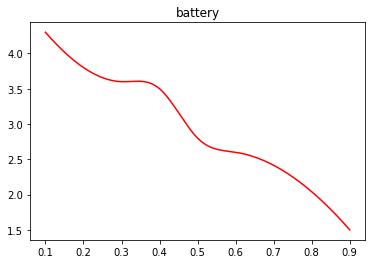

In [9]:
plt.plot(xnew_b, y_smooth_b, 'r')
plt.title('battery')
plt.show()

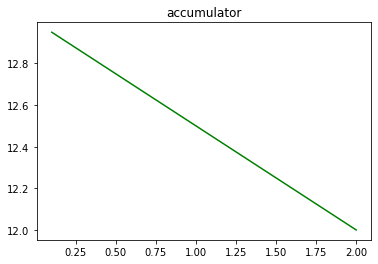

In [10]:
plt.plot(xnew_a, y_smooth_a, 'g')
plt.title('accumulator')
plt.show()

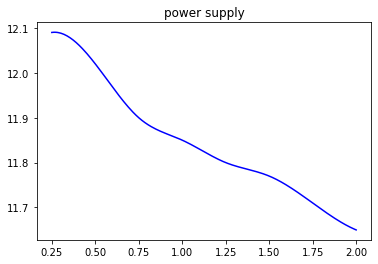

In [11]:
plt.plot(xnew_ps, y_smooth_ps, 'b')
plt.title('power supply')
plt.show()

## Graph of dependecy between approximized U and I 

Equation of approximation / Linear regration:  
-3.329 x + 4.604


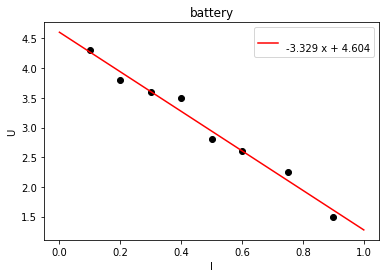

In [12]:
x=battery['I']
y=battery['U']

plt.scatter(x,y,color="black")
plt.title("battery")
plt.xlabel("I")
plt.ylabel("U")

linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,2)
plt.plot(x_s,linear_model_fn(x_s),color="red")

print(f'Equation of approximation / Linear regration: {np.poly1d(linear_model)}')
battery.update({'R_i(approx)':np.repeat(abs(np.poly1d(linear_model).c[0]), len(x))})

plt.legend([str(np.poly1d(linear_model))])
plt.show()

Equation of approximation / Linear regration:  
-0.5 x + 13


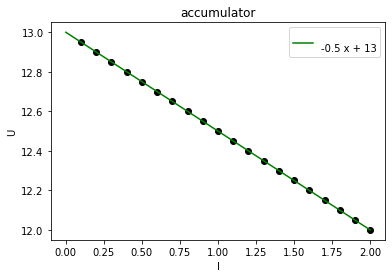

In [13]:
x=accumulator['I']
y=accumulator['U']

plt.scatter(x,y,color="black")
plt.title("accumulator")
plt.xlabel("I")
plt.ylabel("U")

linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,3)
plt.plot(x_s,linear_model_fn(x_s),color="green")

print(f'Equation of approximation / Linear regration: {np.poly1d(linear_model)}')
accumulator.update({'R_i(approx)':np.repeat(abs(np.poly1d(linear_model).c[0]), len(x))})

plt.legend([str(np.poly1d(linear_model))])
plt.show()

Equation of approximation / Linear regration:  
-0.2414 x + 12.12


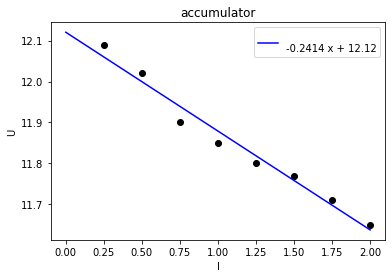

In [14]:
x=power_supply['I']
y=power_supply['U']

plt.scatter(x,y,color="black")
plt.title("accumulator")
plt.xlabel("I")
plt.ylabel("U")

linear_model=np.polyfit(x,y,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,3)
plt.plot(x_s,linear_model_fn(x_s),color="blue")

print(f'Equation of approximation / Linear regration: {np.poly1d(linear_model)}')
power_supply.update({'R_i(approx)':np.repeat(abs(np.poly1d(linear_model).c[0]), len(x))})

plt.legend([str(np.poly1d(linear_model))])
plt.show()

## Calculations

In [15]:
def calculate_R_i(data):
  data.update({'R_i':np.absolute(np.divide(data['I'], data['U']))})
  return data

In [16]:
def calculate_R_e(data):
  data.update({'R_e':np.subtract(np.divide(data['I'], data['U_0']), data['R_i'])})
  return data

In [17]:
#def calculate_R_approx(data): added while building graphs

In [18]:
def calculate_U_i(data):
  data.update({'U_i':np.absolute(np.multiply(data['I'], data['R_i(approx)']))})
  return data

In [19]:
def calculate_U_e(data):
  data.update({'U_e':np.absolute(np.multiply(data['I'], data['R_e']))})
  return data

In [20]:
def calculate_P_e(data):
  data.update({'P_e':np.absolute(np.multiply(np.multiply(data['I'], data['I']), data['R_e']))})
  return data

In [21]:
def calculate_P_i(data):
  data.update({'P_i':np.absolute(np.multiply(np.multiply(data['I'], data['I']), data['R_i']))})
  return data

In [22]:
def calculate_I_kz(data):
  data.update({'I_kz':np.absolute(np.divide(data['U_0'], data['R_i(approx)']))})
  return data

In [23]:
def calculate_P_0(data):
  data.update({'P_0':np.absolute(np.multiply(data['U_0'], data['I_kz']))})
  return data

In [24]:
def calculate_div_Pe0(data):
  data.update({'P_e/P_0':np.absolute(np.divide(data['P_e'], data['P_0']))})
  return data

In [25]:
def calculate_div_Pi0(data):
  data.update({'P_i/P_0':np.absolute(np.divide(data['P_i'], data['P_0']))})
  return data

In [26]:
def calculate_P(data):
  data.update({'P':np.absolute(np.add(data['P_i'], data['P_e']))})
  return data

In [27]:
def calculate_div_PP0(data):
  data.update({'P/P_0':np.absolute(np.divide(data['P'], data['P_0']))})
  return data

In [28]:
def calculate_efficiency(data):
  data.update({'Efficiency':np.absolute(np.multiply(data['P_e/P_0'], 100))})
  return data

In [29]:
def calculate_R_abs(data):
  data.update({'{R}':np.absolute(np.divide(np.repeat(np.sum(data['R_i']), len(data['R_i'])), len(data['R_i'])))})
  return data

In [30]:
def calculate_delta_R(data):
  #R_avrg = np.sum(data['R_i']) / len(data['R_i'])
  #s = np.sqrt(np.sum(np.power(np.subtract(data['R_i'], np.repeat(R_avrg, len(data['R_i']))), 2)) / (len(data['R_i']) * (len(data['R_i']) - 1)))
  data.update({'delta R':np.sqrt(np.sum(np.power(np.subtract(data['R_i'], np.repeat(np.sum(data['R_i']) / len(data['R_i']), len(data['R_i']))), 2)) / (len(data['R_i']) * (len(data['R_i']) - 1)))})
  return data

In [31]:
def calculate_epsilon_R(data):
  data.update({'epsilon R':np.repeat(data['delta R'] / np.sum(data['R_i']) / len(data['R_i']), len(data['R_i']))})
  return data

In [32]:
def calculate_all(data):
  data = calculate_R_i(data)
  data = calculate_R_e(data)
  data = calculate_U_i(data)
  data = calculate_U_e(data)
  data = calculate_P_e(data)
  data = calculate_P_i(data)
  data = calculate_I_kz(data)
  data = calculate_P_0(data)
  data = calculate_div_Pe0(data)
  data = calculate_div_Pi0(data)
  data = calculate_P(data)
  data = calculate_div_PP0(data)
  data = calculate_efficiency(data)
  data = calculate_R_abs(data)
  data = calculate_delta_R(data)
  data = calculate_epsilon_R(data)

  return data

In [42]:
battery = calculate_all(battery)
accumulator = calculate_all(accumulator)
power_supply = calculate_all(power_supply)

## Display data

In [44]:
df_battery = pd.DataFrame.from_dict(battery)
df_battery = df_battery.round(3)
df_battery

,U_0,I,U,R_i(approx),R_i,R_e,U_i,U_e,P_e,P_i,I_kz,P_0,P_e/P_0,P_i/P_0,P,P/P_0,Efficiency,{R},$\delta R$,$ arepsilon R$
0,4.5,0.10,4.30,3.329,0.023,-0.001,0.333,0.000,0.000,0.000,1.352,6.083,0.000,0.000,0.000,0.000,0.000,0.202,0.067,0.005
1,4.5,0.20,3.80,3.329,0.053,-0.008,0.666,0.002,0.000,0.002,1.352,6.083,0.000,0.000,0.002,0.000,0.005,0.202,0.067,0.005
2,4.5,0.30,3.60,3.329,0.083,-0.017,0.999,0.005,0.001,0.008,1.352,6.083,0.000,0.001,0.009,0.001,0.025,0.202,0.067,0.005
3,4.5,0.40,3.50,3.329,0.114,-0.025,1.332,0.010,0.004,0.018,1.352,6.083,0.001,0.003,0.022,0.004,0.067,0.202,0.067,0.005
4,4.5,0.50,2.80,3.329,0.179,-0.067,1.664,0.034,0.017,0.045,1.352,6.083,0.003,0.007,0.062,0.010,0.277,0.202,0.067,0.005
5,4.5,0.60,2.60,3.329,0.231,-0.097,1.997,0.058,0.035,0.083,1.352,6.083,0.006,0.014,0.118,0.019,0.577,0.202,0.067,0.005
6,4.5,0.75,2.25,3.329,0.333,-0.167,2.497,0.125,0.094,0.188,1.352,6.083,0.015,0.031,0.281,0.046,1.541,0.202,0.067,0.005
7,4.5,0.90,1.50,3.329,0.600,-0.400,2.996,0.360,0.324,0.486,1.352,6.083,0.053,0.080,0.810,0.133,5.326,0.202,0.067,0.005


In [45]:
df_accumulator = pd.DataFrame.from_dict(accumulator)
df_accumulator = df_accumulator.round(3)
df_accumulator

,U_0,I,U,R_i(approx),R_i,R_e,U_i,U_e,P_e,P_i,I_kz,P_0,P_e/P_0,P_i/P_0,P,P/P_0,Efficiency,{R},$\delta R$,$ arepsilon R$
0,13,0.1,12.95,0.5,0.008,-0.000,0.05,0.000,0.000,0.000,26.0,338.0,0.0,0.000,0.000,0.000,0.000,0.085,0.011,0.0
1,13,0.2,12.90,0.5,0.016,-0.000,0.10,0.000,0.000,0.001,26.0,338.0,0.0,0.000,0.001,0.000,0.000,0.085,0.011,0.0
2,13,0.3,12.85,0.5,0.023,-0.000,0.15,0.000,0.000,0.002,26.0,338.0,0.0,0.000,0.002,0.000,0.000,0.085,0.011,0.0
3,13,0.4,12.80,0.5,0.031,-0.000,0.20,0.000,0.000,0.005,26.0,338.0,0.0,0.000,0.005,0.000,0.000,0.085,0.011,0.0
4,13,0.5,12.75,0.5,0.039,-0.001,0.25,0.000,0.000,0.010,26.0,338.0,0.0,0.000,0.010,0.000,0.000,0.085,0.011,0.0
5,13,0.6,12.70,0.5,0.047,-0.001,0.30,0.001,0.000,0.017,26.0,338.0,0.0,0.000,0.017,0.000,0.000,0.085,0.011,0.0
6,13,0.7,12.65,0.5,0.055,-0.001,0.35,0.001,0.001,0.027,26.0,338.0,0.0,0.000,0.028,0.000,0.000,0.085,0.011,0.0
7,13,0.8,12.60,0.5,0.063,-0.002,0.40,0.002,0.001,0.041,26.0,338.0,0.0,0.000,0.042,0.000,0.000,0.085,0.011,0.0
8,13,0.9,12.55,0.5,0.072,-0.002,0.45,0.002,0.002,0.058,26.0,338.0,0.0,0.000,0.060,0.000,0.001,0.085,0.011,0.0
9,13,1.0,12.50,0.5,0.080,-0.003,0.50,0.003,0.003,0.080,26.0,338.0,0.0,0.000,0.083,0.000,0.001,0.085,0.011,0.0


In [46]:
df_power_supply = pd.DataFrame.from_dict(power_supply)
df_power_supply = df_power_supply.round(3)
df_power_supply

,U_0,I,U,R_i(approx),R_i,R_e,U_i,U_e,P_e,P_i,I_kz,P_0,P_e/P_0,P_i/P_0,P,P/P_0,Efficiency,{R},$\delta R$,$ arepsilon R$
0,12.13,0.25,12.09,0.241,0.021,-0.000,0.060,0.000,0.000,0.001,50.243,609.443,0.0,0.000,0.001,0.000,0.000,0.096,0.019,0.003
1,12.13,0.50,12.02,0.241,0.042,-0.000,0.121,0.000,0.000,0.010,50.243,609.443,0.0,0.000,0.010,0.000,0.000,0.096,0.019,0.003
2,12.13,0.75,11.90,0.241,0.063,-0.001,0.181,0.001,0.001,0.035,50.243,609.443,0.0,0.000,0.036,0.000,0.000,0.096,0.019,0.003
3,12.13,1.00,11.85,0.241,0.084,-0.002,0.241,0.002,0.002,0.084,50.243,609.443,0.0,0.000,0.086,0.000,0.000,0.096,0.019,0.003
4,12.13,1.25,11.80,0.241,0.106,-0.003,0.302,0.004,0.005,0.166,50.243,609.443,0.0,0.000,0.170,0.000,0.001,0.096,0.019,0.003
5,12.13,1.50,11.77,0.241,0.127,-0.004,0.362,0.006,0.009,0.287,50.243,609.443,0.0,0.000,0.295,0.000,0.001,0.096,0.019,0.003
6,12.13,1.75,11.71,0.241,0.149,-0.005,0.423,0.009,0.016,0.458,50.243,609.443,0.0,0.001,0.474,0.001,0.003,0.096,0.019,0.003
7,12.13,2.00,11.65,0.241,0.172,-0.007,0.483,0.014,0.027,0.687,50.243,609.443,0.0,0.001,0.714,0.001,0.004,0.096,0.019,0.003


## Some more graphs

In [78]:
data_battery = {
    'R_e/R_i' : np.absolute(np.divide(battery['R_e'], battery['R_i'])),
    'U_e/U' : np.absolute(np.divide(battery['U_e'], battery['U'])),
    'I/I_kz' : np.absolute(np.divide(battery['I'], battery['I_kz'])),
    'P/P_0' : battery['P/P_0']
}
data_accumulator = {
    'R_e/R_i' : np.absolute(np.divide(accumulator['R_e'], accumulator['R_i'])),
    'U_e/U' : np.absolute(np.divide(accumulator['U_e'], accumulator['U'])),
    'I/I_kz' : np.absolute(np.divide(accumulator['I'], accumulator['I_kz'])),
    'P/P_0' : accumulator['P/P_0']
}
data_power_supply = {
    'R_e/R_i' : np.absolute(np.divide(power_supply['R_e'], power_supply['R_i'])),
    'U_e/U' : np.absolute(np.divide(power_supply['U_e'], power_supply['U'])),
    'I/I_kz' : np.absolute(np.divide(power_supply['I'], power_supply['I_kz'])),
    'P/P_0' : power_supply['P/P_0']
}

{'R_e/R_i': array([0.00384615, 0.00769231, 0.01153846, 0.01538462, 0.01923077,
       0.02307692, 0.02692308, 0.03076923, 0.03461538, 0.03846154,
       0.04230769, 0.04615385, 0.05      , 0.05384615, 0.05769231,
       0.06153846, 0.06538462, 0.06923077, 0.07307692, 0.07692308]), 'U_e/U': array([2.29343859e-07, 1.84900131e-06, 6.28903716e-06, 1.50240385e-05,
       2.95744240e-05, 5.15077953e-05, 8.24403299e-05, 1.24038219e-04,
       1.78019152e-04, 2.46153846e-04, 3.30267626e-04, 4.32242056e-04,
       5.54016620e-04, 6.97590466e-04, 8.65024189e-04, 1.05844169e-03,
       1.28003210e-03, 1.53205172e-03, 1.81682610e-03, 2.13675214e-03]), 'I/I_kz': array([0.00384615, 0.00769231, 0.01153846, 0.01538462, 0.01923077,
       0.02307692, 0.02692308, 0.03076923, 0.03461538, 0.03846154,
       0.04230769, 0.04615385, 0.05      , 0.05384615, 0.05769231,
       0.06153846, 0.06538462, 0.06923077, 0.07307692, 0.07692308]), 'P/P_0': array([2.29340466e-07, 1.84889190e-06, 6.28819986e-06, 1.502048

In [76]:
#battery
xnew_db = np.linspace(data_battery['R_e/R_i'].min(), data_battery['R_e/R_i'].max(), 200) 
spl_db1 = make_interp_spline(data_battery['R_e/R_i'], data_battery['U_e/U'], k=3)
y_smooth_db1 = spl_db1(xnew_db)
spl_db2 = make_interp_spline(data_battery['R_e/R_i'], data_battery['I/I_kz'], k=3)
y_smooth_db2 = spl_db2(xnew_db)
spl_db3 = make_interp_spline(data_battery['R_e/R_i'], data_battery['P/P_0'], k=3)
y_smooth_db3 = spl_db3(xnew_db)

#accumulator
xnew_da = np.linspace(data_accumulator['R_e/R_i'].min(), data_accumulator['R_e/R_i'].max(), 200) 
spl_da1 = make_interp_spline(data_accumulator['R_e/R_i'], data_accumulator['U_e/U'], k=3)
y_smooth_da1 = spl_da1(xnew_da)
spl_da2 = make_interp_spline(data_accumulator['R_e/R_i'], data_accumulator['I/I_kz'], k=3)
y_smooth_da2 = spl_da2(xnew_da)
spl_da3 = make_interp_spline(data_accumulator['R_e/R_i'], data_accumulator['P/P_0'], k=3)
y_smooth_da3 = spl_da3(xnew_da)

#power_supply
xnew_dps = np.linspace(data_power_supply['R_e/R_i'].min(), data_power_supply['R_e/R_i'].max(), 200) 
spl_dps1 = make_interp_spline(data_power_supply['R_e/R_i'], data_power_supply['U_e/U'], k=3)
y_smooth_dps1 = spl_dps1(xnew_dps)
spl_dps2 = make_interp_spline(data_power_supply['R_e/R_i'], data_power_supply['I/I_kz'], k=3)
y_smooth_dps2 = spl_dps2(xnew_dps)
spl_dps3 = make_interp_spline(data_power_supply['R_e/R_i'], data_power_supply['P/P_0'], k=3)
y_smooth_dps3 = spl_dps3(xnew_dps)

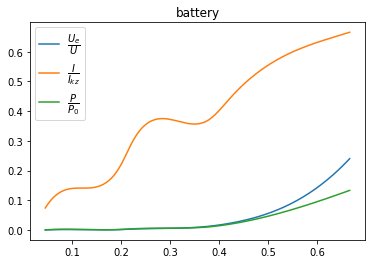

In [69]:
plt.plot(xnew_db, y_smooth_db1, label=r'$\dfrac{U_e}{U}$')
plt.plot(xnew_db, y_smooth_db2, label=r'$\dfrac{I}{I_{kz}}$')
plt.plot(xnew_db, y_smooth_db3, label=r'$\dfrac{P}{P_0}$')
plt.title('battery')
plt.legend()
plt.show()

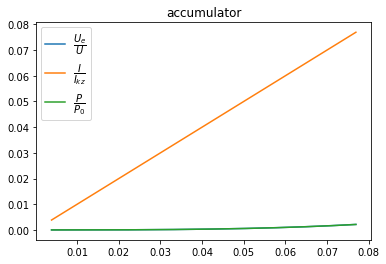

In [73]:
plt.plot(xnew_da, y_smooth_da1, label=r'$\dfrac{U_e}{U}$')
plt.plot(xnew_da, y_smooth_da2, label=r'$\dfrac{I}{I_{kz}}$')
plt.plot(xnew_da, y_smooth_da3, label=r'$\dfrac{P}{P_0}$')
plt.title('accumulator')
plt.legend()
plt.show()

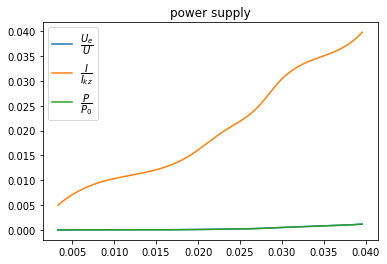

In [77]:
plt.plot(xnew_dps, y_smooth_dps1, label=r'$\dfrac{U_e}{U}$')
plt.plot(xnew_dps, y_smooth_dps2, label=r'$\dfrac{I}{I_{kz}}$')
plt.plot(xnew_dps, y_smooth_dps3, label=r'$\dfrac{P}{P_0}$')
plt.title('power supply')
plt.legend()
plt.show()

## And some more graphs

In [79]:
data_battery = {
    'I/I_kz' : np.absolute(np.divide(battery['I'], battery['I_kz'])),
    'P_e/P_0' : battery['P_e/P_0'],
    'P_i/P_0' : battery['P_i/P_0'],
    'P/P_0' : battery['P/P_0']
}
data_accumulator = {
    'I/I_kz' : np.absolute(np.divide(accumulator['I'], accumulator['I_kz'])),
    'P_e/P_0' : accumulator['P_e/P_0'],
    'P_i/P_0' : accumulator['P_i/P_0'],
    'P/P_0' : accumulator['P/P_0']
}
data_power_supply = {
    'I/I_kz' : np.absolute(np.divide(power_supply['I'], power_supply['I_kz'])),
    'P_e/P_0' : power_supply['P_e/P_0'],
    'P_i/P_0' : power_supply['P_i/P_0'],
    'P/P_0' : power_supply['P/P_0']
}

In [80]:
#battery
xnew_db = np.linspace(data_battery['I/I_kz'].min(), data_battery['I/I_kz'].max(), 200) 
spl_db1 = make_interp_spline(data_battery['I/I_kz'], data_battery['P_e/P_0'], k=3)
y_smooth_db1 = spl_db1(xnew_db)
spl_db2 = make_interp_spline(data_battery['I/I_kz'], data_battery['P_i/P_0'], k=3)
y_smooth_db2 = spl_db2(xnew_db)
spl_db3 = make_interp_spline(data_battery['I/I_kz'], data_battery['P/P_0'], k=3)
y_smooth_db3 = spl_db3(xnew_db)

#accumulator
xnew_da = np.linspace(data_accumulator['I/I_kz'].min(), data_accumulator['I/I_kz'].max(), 200) 
spl_da1 = make_interp_spline(data_accumulator['I/I_kz'], data_accumulator['P_e/P_0'], k=3)
y_smooth_da1 = spl_da1(xnew_da)
spl_da2 = make_interp_spline(data_accumulator['I/I_kz'], data_accumulator['P_i/P_0'], k=3)
y_smooth_da2 = spl_da2(xnew_da)
spl_da3 = make_interp_spline(data_accumulator['I/I_kz'], data_accumulator['P/P_0'], k=3)
y_smooth_da3 = spl_da3(xnew_da)

#power_supply
xnew_dps = np.linspace(data_power_supply['I/I_kz'].min(), data_power_supply['I/I_kz'].max(), 200) 
spl_dps1 = make_interp_spline(data_power_supply['I/I_kz'], data_power_supply['P_e/P_0'], k=3)
y_smooth_dps1 = spl_dps1(xnew_dps)
spl_dps2 = make_interp_spline(data_power_supply['I/I_kz'], data_power_supply['P_i/P_0'], k=3)
y_smooth_dps2 = spl_dps2(xnew_dps)
spl_dps3 = make_interp_spline(data_power_supply['I/I_kz'], data_power_supply['P/P_0'], k=3)
y_smooth_dps3 = spl_dps3(xnew_dps)

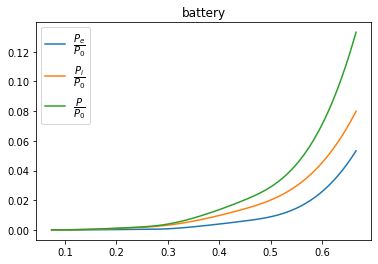

In [81]:
plt.plot(xnew_db, y_smooth_db1, label=r'$\dfrac{P_e}{P_0}$')
plt.plot(xnew_db, y_smooth_db2, label=r'$\dfrac{P_i}{P_0}$')
plt.plot(xnew_db, y_smooth_db3, label=r'$\dfrac{P}{P_0}$')
plt.title('battery')
plt.legend()
plt.show()

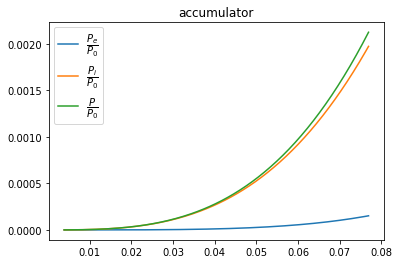

In [82]:
plt.plot(xnew_da, y_smooth_da1, label=r'$\dfrac{P_e}{P_0}$')
plt.plot(xnew_da, y_smooth_da2, label=r'$\dfrac{P_i}{P_0}$')
plt.plot(xnew_da, y_smooth_da3, label=r'$\dfrac{P}{P_0}$')
plt.title('accumulator')
plt.legend()
plt.show()

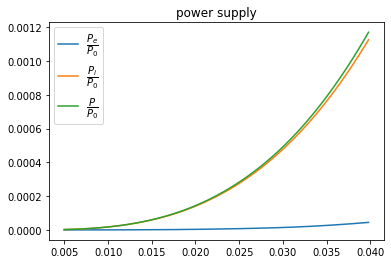

In [83]:
plt.plot(xnew_dps, y_smooth_dps1, label=r'$\dfrac{P_e}{P_0}$')
plt.plot(xnew_dps, y_smooth_dps2, label=r'$\dfrac{P_i}{P_0}$')
plt.plot(xnew_dps, y_smooth_dps3, label=r'$\dfrac{P}{P_0}$')
plt.title('power supply')
plt.legend()
plt.show()